# Découverte des machines de Turing

Exécuter la cellule suivante, c'est utile si vous reprenez le notebook à un point donné; utiliser `from turing import *` pour repartir rapidement.

In [ ]:
import sys, os
if not sys.path[0].endswith("code"): # pour éviter de re-modifier sys.path
    sys.path.insert(0, os.path.join(sys.path[0], "code"))

## Alan Turing (1912-1954)

<p style="text-align: center;"><a href="https://fr.wikipedia.org/wiki/Alan_Turing" ><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/Alan_Turing_Aged_16.jpg/330px-Alan_Turing_Aged_16.jpg"/ width="100px"></a></p>

Une petite vidéo (5 min.) pour les présentations https://youtu.be/zHTBHiOy6eY

## Les machines de Turing

Elles sont avant tout une *expérience de pensée* et ont été inventées avant la construction des premiers ordinateurs (au sens moderne du mot) dans le but d'explorer la notion de **calculabilité**.

Ces machines «automatiques» disposent:
- d'un «**ruban**» \[ *tape* \] infini (des deux côtés) divisé en «cases» \[ *cell* \]. Il représente une sorte de mémoire accessible en lecture et en écriture. Chaque case peut recevoir un **symbole** et un seul.
- d'une «**tête de lecture/écriture**» qui, à chaque instant, pointe l'une des cases du ruban. Celle-ci peut se déplacer le long du ruban d'une case vers la gauche ou vers la droite à chaque étape.
- et d'une sorte d'«**unité de contrôle**» qui regroupe un ensemble de **règles** *de transition* \[ *transition rules* \].

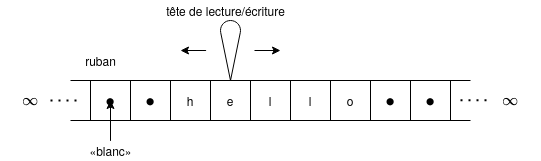

On utilise un symbole spécial appelé «blanc» (ici représenté par un point gras $\bullet$) qui sert de symbole de remplissage d'une case *par défaut*.

À chaque instant, la machine est dans un certain «**état**» et pointe l'une des cases du ruban. Un état n'a pas de «structure interne», la seule chose dont on a besoin est de pouvoir dire si deux états sont identiques ou non... Nous les dénoterons par une lettre majuscule latine. Parmi les états possibles de la machine, on distingue un **état initial** et un **état final**.

Une *règle de transition* est de la forme:

> Si la machine est dans l'**état** \[ *state* \] courant $A$ et si le **symbole** courant (sous la tête de lecture) est $a$ alors:
> - *Écrire* un nouveau **symbole** $b$ (peut-être le même que celui qu'on vient de lire),
> - *Mouvement $\Delta$*: rester sur place ($\downarrow$) ou déplacer la tête de lecture d'une case vers la *gauche* ($\leftarrow$) ou d'une case *vers la droite* ($\rightarrow$).
> - *transition*: passer dans l'état $B$ (peut-être le même que précédemment).

On peut abréger une *règle de transition* par: 

$$\underbrace{A}_{\text{état}}, \underbrace{a}_{\text{symbole}\\\text{lu}}\implies \underbrace{b}_{\text{symbole}\\\text{écrit}}, \underbrace{\Delta}_{\text{mouvement}\in\{\leftarrow ,\rightarrow, \downarrow\}}, \underbrace{B}_{\text{état}}$$

La machine étant «déterministe», il doit exister une règle de transition pour chaque couple (état, symbole) possible (hormis l'état final).

*Exemple*: Notre première machine de Turing possède deux états `D` (état initial) et `F` (état final) et l'alphabet (auquel on se limitera souvent)  $\{0, 1\}$. Sa «table de transitions» abrégée est:

      |   0   |   1   |   ∙   
    --------------------------
    D | 0,→,D | 1,→,D | ∙,←,F

Le couple (état, symbole lu) correspond à la donnée d'une ligne et d'une colonne; la case correspondante donne le triplet: symbole écrit, déplacement de la tête de lecture, nouvel état.

Ainsi, on apprend que **si** la machine lit `1` dans l'état `D` **alors** elle écrit `1`, déplace sa tête de lecture d'une case vers la droite et entre (reste) dans l'état `D`.

On peut aussi représenté la machine à l'aide d'un diagramme «état-transition» comme celui-ci:

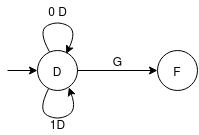

L'état initial A est indiqué par une flèche sans point de départ; l'état final F n'a pas de transition de sortie. Sur les transitions 0D veut dire «j'ai lu 0 sans le modifier et je me suis déplacé à Droite»; G «j'ai lu un blanc sans le modifier et je me suis déplacé à Gauche». L'état suivant est pointé par la flèche de transition.

Si l'entrée de la machine contient le mot 110 et qu'initialement la tête de lecture est sur le 1 le plus à gauche, l'exécution de la machine aboutit à la suite de **configurations**:

       ∙ | 1 | 1 | 0 | ∙  =>  ∙ | 1 | 1 | 0 | ∙  =>  ∙  | 1 | 1 | 0 | ∙   =>
           ↑                          ↑                           ↑   
           D                          D                           D
       ∙ | 1 | 1 | 0 | ∙  =>  ∙ | 1 | 1 | 0 | ∙
                       ↑                  ↑                                   
                       D                  F  
Il n'est pas difficile de se convaincre que cette machine finira toujours par «pointer» le bit de poids faible du mot binaire qu'elle pointe initialement.

#### Exercice 1

Voici la table de transition d'une autre machine de Turing:

      |   0   |   1   |   ∙   
    --------------------------
    D | 1,→,D | 0,→,D | ∙,←,R
    R | 0,←,R | 1,←,R | ∙,→,F

1. Si la machine est exécutée avec l'entrée `1011` en pointant initialement sur le bit de poids fort, quelle est sa sortie? On pourra tracer la suite de ces configurations comme dans l'exemple précédent.
   Au final, que fait-elle?

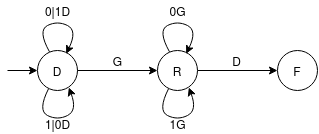

       ∙ | 1 | 0 | 1 | 1 | ∙  =>  ∙ | 0 | 0 | 1 | 1 | ∙  =>  ∙ | 0 | 1 | 1 | 1 | ∙   => ...
           ↑                              ↑                              ↑
           D                              D                               D
       ∙ | 0 | 1 | 0 | 0 | ∙  =>  ∙ | 0 | 1 | 0 | 0 | ∙  =>  ∙ | 0 | 1 | 0 | 0 | ∙   => ...
                           ↑                      ↑                      ↑    
                           D                      R                      R
       ∙ | 0 | 1 | 0 | 0 | ∙  =>  ∙ | 0 | 1 | 0 | 0 | ∙
       ↑                              ↑                                         
       R                              F                
       
La sortie est `0100`. Au final, cette machine produit assez clairement l'*inversion bit à bit* du mot fourni en entrée et «rembobine».

2. Modifier cette machine de telle sorte qu'elle face le même calcul quelle que soit la position initial de la tête de lecture sur l'un des bits du mot saisie en entrée; elle doit finalement pointer sur le bit de poids fort.

L'idée est de chercher le bit de poids faible puis d'effectuer l'inversion au retour...

      |   0   |   1   |   ∙   
    --------------------------
    D | 0,→,D | 1,→,D | ∙,←,R
    R | 1,←,R | 0,←,R | ∙,→,F

#### Exercice 2

1. Que fait la machine de Turing donnée par la table de transition suivante:

          |   0   |   1   |   ∙   
        --------------------------
        A | 0,→,A | 1,→,A | ∙,←,B
        B | 1,↓,F | 1,←,B | ∙,↓,F
   

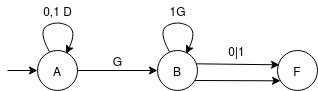

2. Améliorer là de façon qu'elle pointe sur le bit de poid fort à la fin de l'exécution.

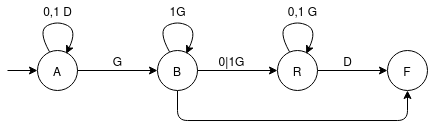

## Modélisation du «ruban» - `TabBiDir`

Afin de modéliser le ruban d'une machine de Turing, on va définir une class `TabBiDir` pour des tableaux bidirectionnels dont une partie des éléments ont des indices positifs et une partie des éléments des indices négatifs, et qui sont extensibles aussi bien par la gauche que par la droite. 

Plus précisément, les indices d'un tel tableau bidirectionnel vont aller d'un indice $i_{min}$ à un indice $i_{max}$, tous deux *inclus*, et tels que $i_{min}\leqslant 0$ et $-1\leqslant i_{max}$. Le tableau directionnel vide correspond au cas où $i_{min}$ vaut $0$ et $i_{max}$ vaut $-1$.

La classe `TabBiDir` a pour attributs deux tableaux Python:
- un tableau `droite` contenant les éléments d'*indices positifs ou nul*, et et 
- un tableau `gauche` contenant les éléments d'*indices strictement négatifs*.
    - Ainsi `gauche[0]` contiendra l'élément d'indice `-1` du tableau bidirectionnel, `gauche[1]` celui d'indice `-2` et ainsi de suite.

Voici un exemple d'utilisation:

```python
t = TabBiDir([1,2,3], [7, 8])
print(t) # [1, 2, 3, 7, 8]
t.prepend(12)
t.append(0)
print(t) # [12, 1, 2, 3, 7, 8, 0]
assert t[t.imin()] == 12
assert t[t.imax()] == 0
```

1. Écrire un constructeur `__init__(self, g, d)` construisant un *tableau bidirectionnel* contenant, dans l'ordre, les éléments des tableaux `g` et `d`. Le dernier élément de `g` (si `g` n'est pas vide), devra être calé sur l'indice $-1$ du tableau bidirectionnel, et le premier élément de `d` (si `d` n'est pas vide) sur l'indice `0`. 
   
   Écrire également des méthodes `imin(self)` et `imax(self)` renvoyant respectivement l'indice minimum et l'indice maximum.

In [ ]:
class TabBiDir:
    
    def __init__(self, g=None, d=None):
        self.g = [] if g is None else [g[len(g)-i-1] for i in range(len(g))] # ou g[::-1]...
        self.d = [] if d is None else d
    
    def imin(self):
        return -len(self.g)
    
    def imax(self):
        return len(self.d) - 1

2. Ajouter une méthode `append(self, v)` qui comme son homonyme des tableaux Python ajoute l'élément `v` à droite du tableau bidirectionnel `self`, et une méthode `prepend(self, v)` ajoutant cette fois l'élément `v` à gauche du tableau bidirectionnel `self`. Utiliser `append` sur un tableau bidirectionnel vide place l'élément à l'indice `0`. Utiliser `prepend` sur un tableau bidirectionnel vide place l'élément à l'indice `-1`.

In [ ]:
def append(self, v):
    self.d.append(v)

def prepend(self, v):
    self.g.append(v)

TabBiDir.append = append
TabBiDir.prepend = prepend
del append
del prepend

3. Ajouter une méthode `__getitem__(self, i)` qui renvoie l'élément du *tableau bidirectionnel* `self` à l'indice `i`, et une méthode `__setitem__(self, i, v)` qui modifie l'élément du tableau `self` d'indice `i` pour lui donner la valeur `v`.

In [ ]:
def getitem(self, i):
    if i >= 0:
        return self.d[i]
    else:
        return self.g[-i-1]

def setitem(self, i, v):
    if i >= 0:
        self.d[i] = v
    else:
        self.g[-i-1] = v

TabBiDir.__getitem__ = getitem
TabBiDir.__setitem__ = setitem
del getitem
del setitem

4. Ajouter une méthode `__str__(self)` qui renvoie une chaîne de caractères décrivant le contenu du tableau.

In [ ]:
def __str__(self):
    if len(self.g) == 0 and len(self.d) == 0:
        return "[]"
    deb = str(list(reversed(self.g)))
    fin = str(self.d)
    if len(self.g) == 0:
        return fin
    elif len(self.d) == 0:
        return deb
    else:
        return deb[:-1] + ", " + fin[1:]
    
TabBiDir.__str__ = __str__
del __str__

## Simulation d'une machine de Turing

On se propose d'écrire un programme simulant l'exécution d'une machine de Turing. Fixons tout d'abord certains choix de représentation:

- Un **état** de la machine est identifié par une chaîne de caractères.

- Le **symbole** écrit dans une case du ruban est aussi représenté par une chaîne de caractères.

- L'ensemble des **règles de transition** de la machine est matérialisé par un **dictionnaire** *dont les clés sont les états*. 
  Consulter ce dictionnaire pour un état donné fournit l'ensemble des règles applicables à partir de cet état, à nouveau sous la forme d'un dictionnaire, dont les clés sont les symboles manipulés par la machine et les valeurs sont les actions associées.

- Les **actions** à effectuer à la lecture d'un symbole donné dans un état donné sont représentées par un triplet $(e,d,s)$ où:
    - $e$ est le symbole à écrire (une chaîne de caractères),
    - $d$ est le déplacement éventuel: $-1$ pour aller à gauche, $0$ pour ne pas bouger, $1$ pour aller à droite;
    - $s$ est l'état suivant (une chaîne de caractères).



Une machine de Turing est donnée par un *état de départ*, un *état final* et un *dictionnaire de règles de transition*.

Lors de l'exécution de la machine, on fait évoluer une *configuration* formée d'un ruban mémoire, d'une identification de la position et de l'état courant de la machine. Pour représenter le ruban, on utilise un tableau bidirectionnel tel que décrit dans l'exercice précédent.

Ce tableau ne pouvant pas être infini il ne contiendra que les cases effectivement utilisées, toutes les positions au-delà de ce qui est représenté dans le tableau étant réputées contenir le symbole «blanc» $\bullet$. Pour cela, le ruban est initialisé au début de l'exécution avec l'ensemble des cases représentant l'entrée, puis il est étendu à gauche ou à droite à chaque fois que la machine se déplace en dehors des limites courantes.

Écrire une fonction ou une méthode prenant en paramètres la description d'une machine de Turing $M$ et une entrée $e$ pour cette machine, et simulant l'exécution de la machine $M$ sur l'entrée $e$. Il est possible d'utiliser une ou plusieurs classes pour structurer les données manipulées et le code. Tester ce simulateur avec la machine d'incrément de 1 donnée en exercice; cela pourrait ressembler à:


```python
B = TuringMachine.BLANC # alias
prog_incr_1 = {
    'A': {
        "0": ("0",  1, "A"),
        "1": ("1",  1, "A"),
        B  : (B  , -1, "B")
    },
    'B': {
        "0": ("1",  0, "F"),
        "1": ("0", -1, "B"),
        B  : ("1",  0, "F")
    },
}

# Par exemple!
TuringMachine('A', 'F', prog_test).executer_sur("10011")
```

In [ ]:
class TuringMachine:
    BLANC = '.' # le blanc de la machine
    def __init__(self, etat_initial, etat_final, regles):
        self.etat = etat_initial
        self.etat_final = etat_final
        self.regles = regles
        r = TabBiDir()
        r.prepend(self.BLANC)
        self.ruban = r
        self.i = 0 # position sur le ruban
    
    def est_arreter(self):
        return self.etat == self.etat_final
    
    def charger(self, entree, pos=0):
        """charge l'entrée fournie (chaîne de caractères) et la
        place sur le ruban à la position donnée."""
        N = len(entree)
        if pos == 0:
            for c in entree:
                self.ruban.append(c)
            self.ruban.append(self.BLANC)
        elif pos < 0:
            for _ in range(-pos):
                self.ruban.prepend(self.BLANC)
            if N + pos >= 0:
                for _ in range(N+pos):
                    self.ruban.append(self.BLANC)
            else:
                self.ruban.append(self.BLANC)
            for i in range(N):
                self.ruban[pos+i] = entree[i]
        else:
            for _ in range(pos+N+1):
                self.ruban.append(self.BLANC)
            for i in range(pos, pos+N):
                self.ruban[i] = entree[i-pos]

    def suivant(self):
        # lecture
        sym = self.ruban[self.i]
        # Récupérer le triplet correspondant
        sym, depl, etat = self.regles[self.etat][sym]
        # écriture
        self.ruban[self.i] = sym
        # si on est en bout de ruban, se donner de la marge
        if sym is not self.BLANC and self.i == self.ruban.imax():
            self.ruban.append(self.B)
        if sym is not self.BLANC and self.i == self.ruban.imin():
            self.ruban.prepend(self.BLANC)
        # se déplacer et mettre à jour
        self.i += depl
        self.etat = etat
    
    def __str__(self):
        """Affiche la configuration courante de la machine."""
        # plaçons une marque sur le ruban
        sauv = self.ruban[self.i]
        self.ruban[self.i] = "secret"
        # un peu de ménage...
        ruban_str = str(self.ruban)[1:-1].replace("'", "").replace('"', "").replace(", ", " | ")
        # où est la marque?
        pos = ruban_str.find("secret")
        # créons une chaîne qui figure la position courante et l'état
        i_etat_str = " " * pos + "🠁\n" + " " * pos + self.etat
        # restaurer
        ruban_str = ruban_str.replace("secret", sauv) + "\n" + i_etat_str
        self.ruban[self.i] = sauv
        return ruban_str
    
    def executer_sur(self, entree, pos=0, verbeux=True):
        self.charger(entree, pos=pos)
        while not self.est_arreter():
            if verbeux:
                print(self)
            self.suivant()
        print("L'état du ruban est:")
        print(self)
        

B = TuringMachine.BLANC # alias

#### Exercice 3 - mais que fait cette machine?

Voici un ensemble de règles de transition pour une machine de Turing. Son état initial est `P` et son état final `F`.

           |   0    |   1    |   ∙   
        ------------------------------
        P  | ∙,→,D0 | ∙,→,D1 | 1,↓,F
        D0 | 0,→,D0 | 1,→,D0 | ∙,←,V0
        D1 | 0,→,D1 | 1,→,D1 | ∙,←,V1
        V0 | ∙,←,R  | ∙,←,E  | 1,↓,F
        V1 | ∙,←,E  | ∙,←,R  | 1,↓,F
        R  | 0,←,R  | 1,←,R  | ∙,→,P
        E  | ∙,←,E  | ∙,←,E  | 0,↓,F

Avec quel alphabet travaille cette machine? Quels sont les états de la machine? L'exécuter à la main sur l'entrée `1001`, puis sur l'entrée `1110` en considérant à chaque fois qu'en dehors de cette entrée, le ruban est intégralement rempli avec le symbole blanc $\bullet$. Comment se comporte-t-elle dans chacun des états? Que fait cette machine? *Il ne faut pas hésiter à tester la machine sur d'autres entrées, y compris en utilisant le simulateur de l'exercice précédent*.

Diagramme états-transitions

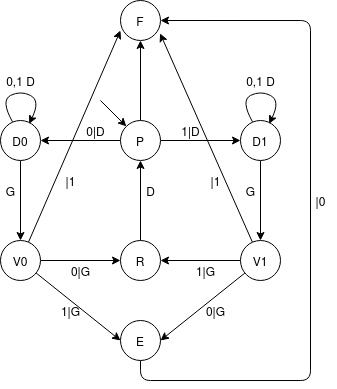

Solution pour `1001`

L'alphabet de la machine est l'ensemble {0, 1} (le «blanc» est un symbole spécial), l'ensemble de ses états est {P, D0, D1, V0, V1, R, E, F}. 

Suite des configurations pour `1001`:

       ∙ | 1 | 0 | 0 | 1 | ∙  =>  ∙ | ∙ | 0 | 0 | 1 | ∙  =>  ∙ | ∙ | 0 | 0 | 1 | ∙   => ...
           ↑                              ↑                              ↑
           P                              D1                             D1
       ∙ | ∙ | 0 | 0 | 1 | ∙  =>  ∙ | ∙ | 0 | 0 | 1 | ∙  =>  ∙ | ∙ | 0 | 0 | ∙ | ∙   =>
                           ↑                      ↑                      ↑    
                           D1                     V1                     R
       ∙ | ∙ | 0 | 0 | ∙ | ∙  =>  ∙ | ∙ | 0 | 0 | ∙ | ∙  =>  ∙ | ∙ | 0 | 0 | ∙ | ∙   =>
               ↑                      ↑                              ↑           
               R                      R                              P
       ∙ | ∙ | ∙ | 0 | ∙ | ∙  =>  ∙ | ∙ | ∙ | 0 | ∙ | ∙  =>  ∙ | ∙ | ∙ | 0 | ∙ | ∙   =>
                   ↑                              ↑                      ↑         
                   D0                             D0                     V0
       ∙ | ∙ | ∙ | ∙ | ∙ | ∙  =>  ∙ | ∙ | ∙ | ∙ | ∙ | ∙  =>  ∙ | ∙ | ∙ | 1 | ∙ | ∙
               ↑                              ↑                          ↑         
               R                              P                          F 

Finalement pour l'entrée `1001` sa sortie est `1`.

Solution pour `1110`

Voici une **autre façon de représenter** la suite de configurations (=ruban+position+état) de la machine; lorsqu'un état est composé *de plus d'un caractère*, il est parenthésé pour éviter toute confusion. Pour l'entrée `1110` cela donne:

        P1110, ∙(D1)110, ∙1(D1)10, ∙11(D1)0, ∙110(D1), ∙11(V1)0, ∙1E1∙, ∙E1∙∙, E∙∙∙∙, F0∙∙∙ 

Finalement pour l'entrée `1110` sa sortie est `0`.

Expérimentation avec le simulateur:

In [ ]:
from turing import *
prog_exo = {
    'P':{
        '0': (B, 1, 'D0'),
        '1': (B, 1, 'D1'),
         B : ('1', 0, 'F'),
    },
    'D0':{
        '0': ('0', 1 , 'D0'),
        '1': ('1', 1, 'D0'),
         B : (B, -1, 'V0'),
    },
    'D1':{
        '0': ('0', 1 , 'D1'),
        '1': ('1', 1, 'D1'),
         B : (B, -1, 'V1'),
    },
    'V0':{
        '0': (B, -1 , 'R'),
        '1': (B, -1, 'E'),
         B : ('1', 0, 'F'),
    },
    'V1':{
        '0': (B, -1 , 'E'),
        '1': (B, -1, 'R'),
         B : ('1', 0, 'F'),
    },
    'R':{
        '0': ('0', -1 , 'R'),
        '1': ('1', -1, 'R'),
         B : (B, 1, 'P'),
    },
    'E':{
        '0': (B, -1 , 'E'),
        '1': (B, -1, 'E'),
         B : ('0', 0, 'F'),
    },
}

TuringMachine('P', 'F', prog_exo).executer_sur("10011")

Conclusion:

Cette machine de Turing «décide» si l'entrée est un **palindrome** (auquel cas elle renvoie 1) ou non (elle renvoie 0).

Un palindrome est une suite de symboles qu'on peut lire indifféremment de gauche à droite ou de droite à gauche. Par exemple `radar`, `kayak`, `bob`, `ressasser` etc.

#### Exercice 4 - shift

Définir une machine de Turing qui décale son entrée d'une case vers la droite. On supposera que l'entrée est composée des symboles 0 et 1 et bordée de symboles blancs $\bullet$. On supposera également que la position de départ de la machine est à l'extrémité gauche de l'entrée.

Correction sous forme de diagramme «état-transition»

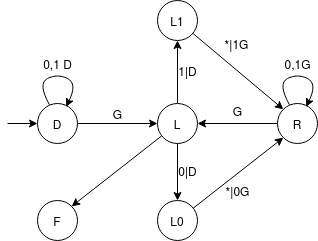

In [ ]:
# 1: Aller jusqu'au dernier symbole non blanc (rightmost)
# 2: Mettre un blanc à la place puis se déplacer à droite
# 3: Écrire le nombre lu à l'étape précédente et se déplacer à gauche
# 4: se déplacer à nouveau à gauche
# 5: reprendre à l'étape 2 si le symbole lue est non blanc autre arrêter
from turing import *
prog_decaler =  {
    'D': {
        '1': ('1', 1, 'D'),
        '0': ('0', 1, 'D'),
        B  : (B, -1, 'L'),
    },
    'L': {
        '1': (B, 1, 'L1'),
        '0': (B, 1, 'L0'),
        B  : (B, 1, 'F'),
    },
    'L1': {
        '1': ('1', -1, 'R'),
        '0': ('1', -1, 'R'),
        B  : ('1', -1, 'R'),
    },
    'L0': {
        '1': ('0', -1, 'R'),
        '0': ('0', -1, 'R'),
        B  : ('0', -1, 'R'),
    },
    'R': {
        '1': ('1', -1, 'R'),
        '0': ('0', -1, 'R'),
        B  : (B, -1, 'L'),
    },
}

TuringMachine('D', 'F', prog_decaler).executer_sur("10011")

#### Exercice 5 - chercher un motif dans un mot

1. Définir une machine de Turing qui, partant de l'extrémité gauche de son entrée, parcourt cette entrée à la recherche du symbole 0. Si le symbole est trouvé elle devra écrire 1 dans la case *précédent l'entrée*, et sinon elle devra y écrire 0. On supposera que l'entrée est composée des symboles 0 et 1 et bordée de symboles blancs $\bullet$.

Correction sous forme de diagramme «état-transition»

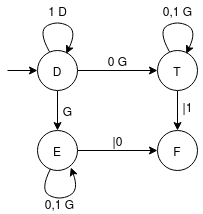

In [ ]:
prog_contient_0 = {
    'D': {
        '0': ('0', -1, 'T'),
        '1': ('1', 1, 'D'),
        B  : (B, -1, 'E'),
    },
    'T': {
        '0': ('0', -1, 'T'),
        '1': ('1', -1, 'T'),
        B  : ('1', 0, 'F'),
    },
    'E': {
        '0': ('0', -1, 'E'),
        '1': ('1', -1, 'E'),
        B  : ('0', 0, 'F'),
    },
}

TuringMachine('D', 'F', prog_contient_0).executer_sur("1111") # essayer "1110" ou "1101"

2. Modifier la machine précédente pour détecter non pas les occurrences de 0 mais, les occurrences de plus de deux symboles 0 consécutifs.

Correction sous forme de diagramme «état-transition»

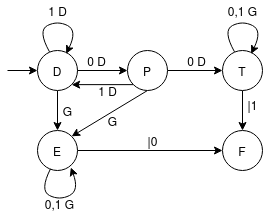

In [ ]:
prog_contient_00_ou_plus = {
    'D': {
        '0': ('0', 1, 'P'),
        '1': ('1', 1, 'D'),
        B  : (B, -1, 'E'),
    },
    'P': {
        '0': ('0', -1, 'T'),
        '1': ('1', 1, 'D'),
        B  : (B, -1, 'E'),
    },
    'T': {
        '0': ('0', -1, 'T'),
        '1': ('1', -1, 'T'),
        B  : ('1', 0, 'F'),
    },
    'E': {
        '0': ('0', -1, 'E'),
        '1': ('1', -1, 'E'),
        B  : ('0', 0, 'F'),
    },
}

TuringMachine('D', 'F', prog_contient_00_ou_plus).executer_sur("1010")

#### Exercice 6 - chercher sans savoir de quel côté 

Supposons un ruban de machine de Turing dont une case contient le symbole 0, et tout le reste le symbole $\bullet$. Supposons que la machine se trouve à une certaine position du ruban, dont on ne sait pas si elle est à gauche ou à droite du symbole 0. Donner un ensemble de règles permettant, à coup sûr, d'arriver en temps fini à la position contenant un 0.

On pourra utiliser un symbole au choix, par exemple l'astérisque `*`, pour laisser une marque sur une case. Un objectif facultatif consiste à nettoyer le ruban de toutes les marques `*` utilisées avant de s'arrêter.

Correction sous forme de diagramme «état-transition»

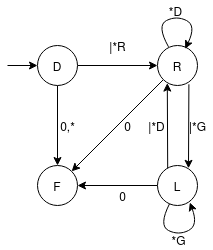

In [ ]:
prog_trouver_le_0 = {
    'D': {
        '0': ('0', 0, 'F'),
        '*': ('*', 0, 'F'),
        B: ('*', 0, 'R'),
    },
    'R': {
        '0': ('0', 0, 'F'),
        '*': ('*', 1, 'R'),
        B: ('*',-1, 'L'),
    },
    'L': {
        '0': ('0', 0, 'F'),
        '*': ('*', -1, 'L'),
        B: ('*',1, 'R'),
    },
}

TuringMachine('D', 'F', prog_trouver_le_0).executer_sur("0", pos=-3)

«Objectif facultatif»

In [ ]:
prog_trouver_le_0_et_nettoyer = {
    'D': {
        '0': ('0', 0, 'F'),
        '*': ('*', 0, 'F'),
        B: ('*', 0, 'R'),
    },
    'R': {
        '0': ('0', -1, 'NR'),
        '*': ('*', 1, 'R'),
        B: ('*',-1, 'L'),
    },
    'L': {
        '0': ('0', 1, 'NL'),
        '*': ('*', -1, 'L'),
        B: ('*',1, 'R'),
    },
    'NL': {
        '0': ('0', 1, 'NL'),
        '*': (B, 1, 'NL'),
        B: (B ,-1, 'GR'),
    },
    'NR': {
        '0': ('0', 1, 'NR'),
        '*': (B, -1, 'NR'),
        B: (B ,1, 'GL'),
    },
    'GL': {
        '0': ('0', 0, 'F'),
        '*': (B, 1, 'NL'),
        B: (B ,1, 'GL'),
    },
    'GR': {
        '0': ('0', 0, 'F'),
        '*': (B, 1, 'NL'),
        B: (B ,-1, 'GR'),
    },
}

TuringMachine('D', 'F', prog_trouver_le_0_et_nettoyer).executer_sur("0", pos=3)